In [7]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [8]:
data=pd.read_csv("personalized_workout_plan2.csv")
data

,User ID,Age,Gender,Fitness Level,Goals,Available Equipment,Workout Plan
0,1,21,Male,Beginner,Weight Loss,Dumbbells,Light Cardio
1,2,27,Other,Advanced,Muscle Gain,NaN,Advanced Strength Training
2,3,63,Female,Advanced,Weight Loss,Dumbbells,HIIT
3,4,46,Other,Beginner,Flexibility,Dumbbells,Basic Yoga
4,5,58,Female,Beginner,Muscle Gain,Resistance Bands,Bodyweight Training
...,...,...,...,...,...,...,...
4995,4996,22,Female,Advanced,Weight Loss,Treadmill,HIIT
4996,4997,25,Other,Beginner,Endurance,NaN,Walking
4997,4998,24,Female,Beginner,Muscle Gain,NaN,Bodyweight Training
4998,4999,55,Other,Advanced,Muscle Gain,NaN,Advanced Strength Training


In [9]:
data.isnull().sum()

User ID                   0
Age                       0
Gender                    0
Fitness Level             0
Goals                     0
Available Equipment    1262
Workout Plan              0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder


In [11]:
le=LabelEncoder()
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()


In [12]:
data["Gender"]=le.fit_transform(data["Gender"])
data["Fitness Level"]=le.fit_transform(data["Fitness Level"])
data["Goals"]=le.fit_transform(data["Goals"])
data["Available Equipment"]=le.fit_transform(data["Available Equipment"])
data["Workout Plan"]=le.fit_transform(data["Workout Plan"])

In [13]:
data

,User ID,Age,Gender,Fitness Level,Goals,Available Equipment,Workout Plan
0,1,21,1,1,3,0,7
1,2,27,2,0,2,3,0
2,3,63,0,0,3,0,4
3,4,46,2,1,1,0,2
4,5,58,0,1,2,1,3
...,...,...,...,...,...,...,...
4995,4996,22,0,0,3,2,4
4996,4997,25,2,1,0,3,11
4997,4998,24,0,1,2,3,3
4998,4999,55,2,0,2,3,0


In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Workout Plan')

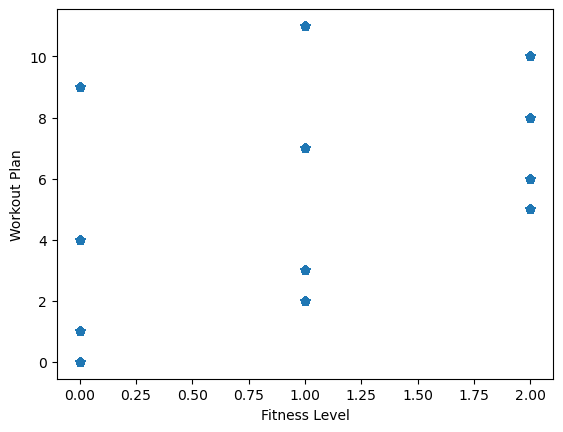

In [15]:
plt.scatter(data["Fitness Level"],data["Workout Plan"],marker="p")
plt.xlabel("Fitness Level")
plt.ylabel("Workout Plan")

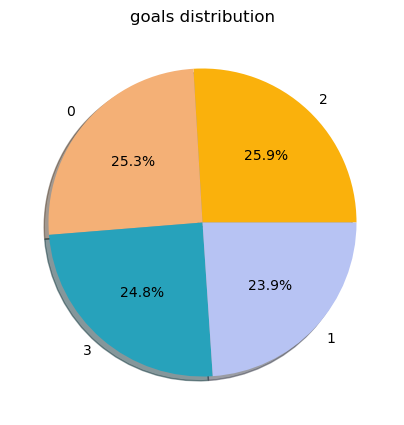

In [16]:
goals_counts=data["Goals"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(goals_counts, labels=goals_counts.index, autopct='%1.1f%%', colors=['#FAB10C','#F4B076','#27A2BB','#B7C3F3'],shadow=True)
plt.title("goals distribution")
plt.show()


Text(0.5, 1.0, 'Age Distribution')

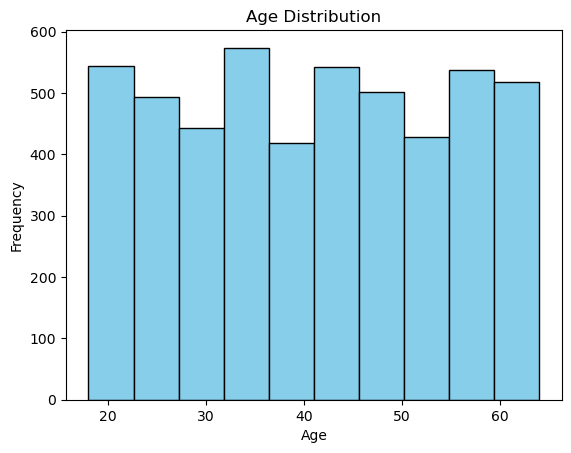

In [17]:
plt.hist(data["Age"],bins=10,color="skyblue",edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

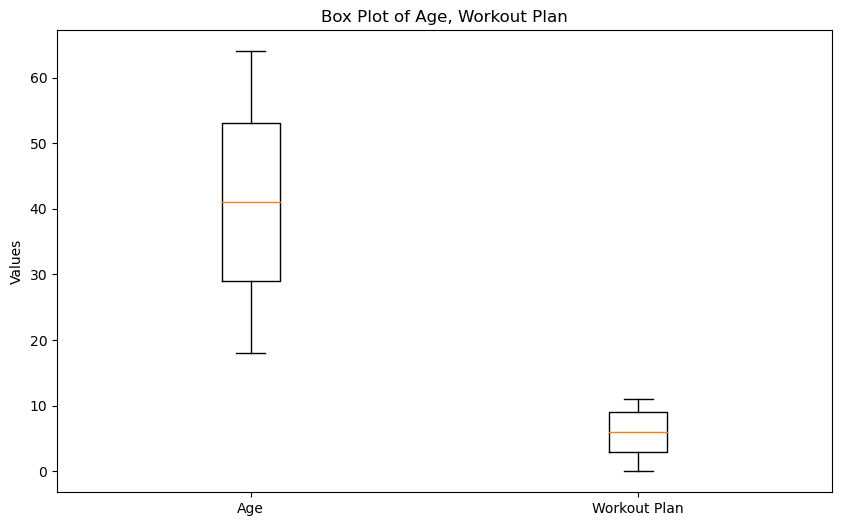

In [18]:
plt.figure(figsize=(10, 6))
plt.boxplot([data['Age'], data['Workout Plan']], labels=["Age", 'Workout Plan'])
plt.title('Box Plot of Age, Workout Plan')
plt.ylabel('Values')
plt.show()

In [19]:
data.describe()

,User ID,Age,Gender,Fitness Level,Goals,Available Equipment,Workout Plan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,40.883000,1.010000,0.998800,1.501600,1.496600,5.579000
std,1443.520003,13.531176,0.807732,0.820325,1.119218,1.128115,3.463894
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,29.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2500.500000,41.000000,1.000000,1.000000,2.000000,2.000000,6.000000
75%,3750.250000,53.000000,2.000000,2.000000,2.000000,3.000000,9.000000
max,5000.000000,64.000000,2.000000,2.000000,3.000000,3.000000,11.000000


# MODEL BUILDING

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier





In [21]:
x=data.drop("Workout Plan",axis=1)
y=data["Workout Plan"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
lr.score(x_train,y_train)

0.5134285714285715

In [27]:
lr.score(x_test,y_test)

0.5046666666666667

In [28]:
lr.predict([[1,21,1,1,3,0]])

array([8])

In [29]:
dt=DecisionTreeClassifier(max_depth=6)

In [30]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [31]:
dt.score(x_train,y_train)

1.0

In [24]:
dt.score(x_test,y_test)

1.0

In [25]:
rf=RandomForestClassifier(n_estimators=20)

In [26]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [27]:
rf.score(x_train,y_train)

1.0

In [28]:
rf.score(x_test,y_test)

1.0

In [123]:
knn=KNeighborsClassifier()

In [124]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [125]:
knn.score(x_train,y_train)

0.34085714285714286

In [126]:
knn.score(x_test,y_test)

0.08866666666666667

In [146]:
svm=SVC(kernel="linear")

In [147]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [37]:
svm.score(x_train,y_train)

1.0

In [38]:
svm.score(x_test,y_test)

1.0

In [155]:
svm2=SVC(kernel="sigmoid")


In [156]:
svm2.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [41]:

svm2.score(x_train,y_train)

0.08028571428571428

In [42]:
svm2.score(x_test,y_test)

0.078

In [164]:
svm3=SVC(kernel="rbf")


In [165]:
svm3.fit(x_train,y_train)

SVC()

In [45]:
svm3.score(x_train,y_train)

0.09885714285714285

In [46]:
svm3.score(x_test,y_test)

0.074

In [172]:
nb=GaussianNB()

In [173]:
nb.fit(x_train,y_train)

GaussianNB()

In [35]:
nb.score(x_train,y_train)

1.0

In [36]:
nb.score(x_test,y_test)

1.0

In [180]:
xg=XGBClassifier()

In [181]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
xg.score(x_train,y_train)

1.0

In [40]:
xg.score(x_test,y_test)

1.0

In [187]:
adb=AdaBoostClassifier()

In [188]:
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [43]:
adb.score(x_train,y_train)

0.26885714285714285

In [44]:
adb.score(x_test,y_test)

0.234

In [200]:
gb=GradientBoostingClassifier()

In [201]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [202]:
gb.score(x_train,y_train)

1.0

In [203]:
gb.score(x_test,y_test)

1.0

In [34]:
def run_model():
    User_ID=int(input("enter the user id"))
    Age=int(input("enter the age"))
    Gender=input("enter the gender")
    Fitness_Level=input("enter the fitness level")
    Goals=input("enter the goals")
    Available_Equipment=input("enter the avialble equipment")
    
    le=LabelEncoder()
    le1=LabelEncoder()
    le2=LabelEncoder()
    le3=LabelEncoder()
    
    Gender=le.fit_transform([Gender])[0]
    Fitness_Level=le1.fit_transform([Fitness_Level])[0]
    Goals=le2.fit_transform([Goals])[0]
    Available_Equipment=le3.fit_transform([Available_Equipment])[0]
    
    
    
    Result=dt.predict([[User_ID,Age,Gender,Fitness_Level,Goals,Available_Equipment]])
    print(Result)

    if Result=="Light Cardio":
        
        print("Workout and steps in Light Cardio:")
        print("Warm-Up:")
        print(f"Start with gentle movements for {warm_up_time} minutes to increase blood flow.")
        print("Examples: Brisk walking, easy jogging, or low-intensity cycling.\n")

        print("Main Cardio Session:")
        print(f"Engage in low-intensity exercises for {main_cardio_time} minutes.")
        print("Examples: Steady walking, slow jogging, or using an elliptical machine.")
        print("Keep a pace where you can still hold a conversation.\n")
    
        print("Cool-Down:")
        print(f"Gradually reduce your pace and cool down for {cool_down_time} minutes.")
        print("Follow with gentle stretching to relax your muscles and improve flexibility.\n")
    
    elif Result=="Bodyweight Training":
        
    
        print("Workout and steps in Bodyweight Training")
        print("Push up:")
        print("1. **Start Position:**")
        print("   - Place your hands slightly wider than shoulder-width apart on the floor.")
        print("   - Keep your body in a straight line from head to heels.")
        print("   - Engage your core and glutes to maintain stability.")
        print("   - Position your feet together or slightly apart for balance.\n")

        print("2. **Lowering Phase:**")
        print("   - Inhale as you bend your elbows and lower your chest towards the floor.")
        print("   - Keep your elbows at a 45-degree angle relative to your torso.")
        print("   - Maintain a straight line with your body; don’t let your hips sag or pike up.\n")

        print("3. **Push-Up Phase:**")
        print("   - Exhale as you press through your hands to push your body back up to the starting position.")
        print("   - Extend your arms fully, but avoid locking your elbows.")
        print("   - Keep your body aligned and core engaged throughout the movement.\n")

        print("4. **Repeat:**")
        print("   - Perform the desired number of repetitions.")
        print("   - Ensure proper form is maintained for each push-up to prevent injury and maximize effectiveness.\n")

        print("5. **Rest:**")
        print("   - Rest for a brief period if needed, then resume your set or workout routine.\n")

        print("6. **Cool Down:**")
        print("   - After completing your push-ups, stretch your chest, shoulders, and triceps to aid recovery and maintain flexibility.\n")
    
    elif Result=="Walking":
            print("steps in walking exercise")
            print("1. **Stand Up Straight:**")
            print("   - Stand with your feet hip-width apart.")
            print("   - Keep your shoulders back and your head up.")
            print("   - Engage your core muscles for stability.\n")
    
            print("2. **Begin to Walk:**")
            print("   - Shift your weight onto one foot.")
            print("   - Lift the opposite foot and move it forward.")
            print("   - Place the heel of your foot down first, then roll through to the toes.\n")
    
            print("3. **Continue Walking:**")
            print("   - Alternate legs, moving one foot forward while the other foot follows.")
            print("   - Swing your arms naturally with your steps to maintain balance and momentum.")
            print("   - Maintain a steady and comfortable pace.\n")
    
            print("4. **Breathing:**")
            print("   - Breathe deeply and evenly.")
            print("   - Inhale through your nose and exhale through your mouth.")
            print("   - Adjust your breathing to match your pace.\n")
    
            print("5. **Adjusting Your Pace:**")
            print("   - Walk faster or slower based on your fitness level and goals.")
            print("   - Make sure your stride is comfortable and not overly strenuous.\n")
    
            print("6. **Cool Down:**")
            print("   - Gradually slow your pace towards the end of your walk.")
            print("   - Stretch your legs, especially your calves, hamstrings, and quadriceps.")
            print("   - Hydrate if necessary.\n")   
    
    elif Result=="Basic Yoga": 
        
        print("workouts and steps in basic yoga:")
        print("1. **Mountain Pose (Tadasana):**")
        print("   - Stand with your feet together and arms by your sides.")
        print("   - Distribute your weight evenly on both feet.")
        print("   - Engage your thighs, lift your chest, and reach your arms overhead.")
        print("   - Hold for 30 seconds to 1 minute.\n")
    
        print("2. **Downward-Facing Dog (Adho Mukha Svanasana):**")
        print("   - Start on your hands and knees, with wrists under shoulders and knees under hips.")
        print("   - Spread your fingers wide and press into the ground.")
        print("   - Lift your hips towards the ceiling, straightening your legs as much as possible.")
        print("   - Hold for 30 seconds to 1 minute, then return to the starting position.\n")
    
    elif Result=="Moderate Cardio":
        
        print("workouts and steps in moderate cardio:")
        print("1. **High Knees**")
        print("   - Stand with your feet hip-width apart.")
        print("   - Jog in place while lifting your knees as high as possible.")
        print("   - Pump your arms in coordination with your legs.")
        print("   - Continue for 1 minute, then rest for 30 seconds.\n")
    
        print("2. **Burpees**")
        print("   - Start in a standing position.")
        print("   - Drop into a squat position and place your hands on the floor.")
        print("   - Jump your feet back into a plank position.")
        print("   - Perform a push-up (optional) and then jump your feet back to your hands.") 
    
    elif Result=="Strength Training":
        
        print("workouts and steps in strength training:")
        print("1. **Warm-Up: Light Cardio**")
        print("   - Start with 5-10 minutes of light cardio, such as jogging or jumping jacks.")
        print("   - This helps increase your heart rate and prepare your muscles for the workout.\n")
    
        print("2. **Squats**")
        print("   - Stand with your feet shoulder-width apart and toes slightly pointing out.")
        print("   - Lower your body by bending your knees and hips, keeping your back straight.")
        print("   - Go down until your thighs are parallel to the ground or slightly below.")
        print("   - Push through your heels to return to the starting position.")
        print("   - Perform 3 sets of 10-15 reps.\n")
    
        print("3. **Push-Ups**")
        print("   - Start in a plank position with your hands slightly wider than shoulder-width apart.")
        print("   - Lower your body until your chest nearly touches the floor.")
        print("   - Keep your body in a straight line from head to heels.")
        print("   - Push through your hands to return to the starting position.")
        print("   - Perform 3 sets of 8-12 reps.\n")
    
        print("4. **Bent-Over Rows**")
        print("   - Stand with your feet hip-width apart, holding dumbbells or a barbell.")
        print("   - Bend at the hips and knees, keeping your back flat and core engaged.")
        print("   - Pull the weights towards your lower ribcage, squeezing your shoulder blades together.")
        print("   - Lower the weights back to the starting position.")
        print("   - Perform 3 sets of 10-12 reps.\n")
    
        print("5. **Lunges**")
        print("   - Stand with your feet together and step forward with one leg.")
        print("   - Lower your hips until both knees are bent at about 90 degrees.")
        print("   - The back knee should hover just above the ground.")
        print("   - Push through the front heel to return to the starting position.")
        print("   - Alternate legs and perform 3 sets of 10-12 reps per leg.\n")
    
        print("6. **Plank**")
        print("   - Start in a forearm plank position with your elbows directly under your shoulders.")
        print("   - Keep your body in a straight line from head to heels.")
        print("   - Engage your core and avoid letting your hips drop or rise.")
        print("   - Hold for 30-60 seconds.")
        print("   - Perform 3 sets.\n")
    
        print("7. **Cool Down: Stretching**")
        print("   - Spend 5-10 minutes stretching the major muscle groups you worked.")
        print("   - Include stretches for the quads, hamstrings, chest, shoulders, and back.")
        print("   - This helps reduce muscle soreness and improve flexibility.\n")
    
    elif Result=="Jogging": 
        print("workout and steps in Jogging:")
        print("1. **Warm-Up:**")
        print("   - Start with 5-10 minutes of light cardio to gradually increase your heart rate.")
        print("   - Options include brisk walking, marching in place, or gentle dynamic stretches.")
        print("   - Include dynamic stretches for your legs, such as leg swings and high knees.\n")
    
        print("2. **Proper Jogging Form:**")
        print("   - Stand tall with your feet hip-width apart.")
        print("   - Keep your shoulders relaxed and your arms bent at about 90 degrees.")
        print("   - Maintain a slight forward lean from your ankles, not your waist.")
        print("   - Look straight ahead and keep your head up.\n")
    
        print("3. **Begin Jogging:**")
        print("   - Start with a comfortable pace, allowing your body to adapt.")
        print("   - Aim to land softly on the middle of your feet and roll through to your toes.")
        print("   - Swing your arms naturally with your stride to help with balance and momentum.")
        print("   - Breathe deeply and evenly through your nose and mouth to ensure adequate oxygen intake.\n")
    
        print("4. **Maintain Your Pace:**")
        print("   - Listen to your body and adjust your pace as needed.")
        print("   - Focus on a steady rhythm rather than speed.")
        print("   - If you're running on a treadmill, ensure the speed is set to a comfortable jogging pace.\n")
    
        print("5. **Cool Down:**")
        print("   - Gradually reduce your jogging pace to a light walk for the last 5 minutes.")
        print("   - Perform static stretches targeting your major muscle groups, especially the legs.")
        print("   - Include stretches for your calves, hamstrings, quadriceps, and hip flexors.")
        print("   - Hold each stretch for 20-30 seconds to help with muscle recovery.\n")
    
        print("6. **Hydration and Recovery:**")
        print("   - Drink water to rehydrate after your jog.")
        print("   - Consider consuming a light snack with protein and carbohydrates to aid recovery.")
        print("   - Allow your body to rest and recover between jogging sessions to prevent overuse injuries.\n")
    
    elif Result=="Intermediate Yoga":
        
        print("workout and steps in intermediate yoga:")
        print("1. **Warm-Up: Sun Salutations (Surya Namaskar)**")
        print("   - Start in Mountain Pose (Tadasana).")
        print("   - Inhale and reach your arms overhead, bringing your palms together.")
        print("   - Exhale and fold forward into a Forward Bend (Uttanasana).")
        print("   - Inhale and step or jump back into a Plank Pose.")
        print("   - Exhale and lower into a Chaturanga (Four-Limbed Staff Pose).")
        print("   - Inhale into Upward-Facing Dog (Urdhva Mukha Svanasana).")
        print("   - Exhale into Downward-Facing Dog (Adho Mukha Svanasana).")
        print("   - Hold for 5-10 breaths, then step or jump forward to Forward Bend.")
        print("   - Inhale to come up to Mountain Pose and repeat 3-5 times.\n")
    
        print("2. **Warrior III (Virabhadrasana III)**")
        print("   - Begin in a standing position.")
        print("   - Shift your weight onto one leg and lift the other leg straight behind you.")
        print("   - Hinge forward at your hips, keeping your torso and lifted leg parallel to the floor.")
        print("   - Extend your arms forward or keep them by your sides for balance.")
        print("   - Hold for 5-10 breaths, then switch legs and repeat.\n")
    
    elif Result=="HIIT":
        
        print("workout and steps in hiit:")
        print("1. **Warm-Up: Light Cardio and Dynamic Stretches**")
        print("   - Start with 5 minutes of light cardio, such as jogging or jumping jacks.")
        print("   - Perform dynamic stretches like leg swings, arm circles, and high knees to prepare your muscles.\n")
    
        print("2. **Exercise 1: Jump Squats**")
        print("   - Stand with your feet shoulder-width apart and lower into a squat position.")
        print("   - Explode upward into a jump, reaching your arms overhead.")
        print("   - Land softly and return to the squat position.")
        print("   - Perform for 30 seconds, then rest for 15 seconds.\n")
    
        print("3. **Exercise 2: Burpees**")
        print("   - Start in a standing position and drop into a squat.")
        print("   - Place your hands on the ground and jump your feet back into a plank position.")
        print("   - Perform a push-up (optional) and then jump your feet back to your hands.")
        print("   - Jump up with your arms reaching overhead.")
        print("   - Perform for 30 seconds, then rest for 15 seconds.\n")
    
        print("4. **Exercise 3: Mountain Climbers**")
        print("   - Start in a plank position with your hands under your shoulders.")
        print("   - Quickly alternate bringing one knee towards your chest while keeping the other leg extended.")
        print("   - Continue switching legs rapidly.")
        print("   - Perform for 30 seconds, then rest for 15 seconds.\n")
    
        print("5. **Exercise 4: High Knees**")
        print("   - Stand with your feet hip-width apart and jog in place.")
        print("   - Lift your knees as high as possible with each step.")
        print("   - Pump your arms in coordination with your legs.")
        print("   - Perform for 30 seconds, then rest for 15 seconds.\n")
    
        print("6. **Exercise 5: Plank Jacks**")
        print("   - Start in a plank position with your feet together and hands under your shoulders.")
        print("   - Jump your feet out to the sides and then back together, while keeping your core engaged.")
        print("   - Continue jumping your feet in and out.")
        print("   - Perform for 30 seconds, then rest for 15 seconds.\n")
    
        print("7. **Cool Down: Light Cardio and Stretching**")
        print("   - Gradually reduce your pace with 5 minutes of light jogging or walking.")
        print("   - Follow with static stretches targeting major muscle groups, such as hamstrings, quads, shoulders, and back.")
        print("   - Hold each stretch for 20-30 seconds to promote flexibility and aid recovery.\n")
    
    elif Result=="Advanced Strength Training":
    
        print("workout and steps in advanced strength training:")
        print("1. **Warm-Up: Dynamic Stretches and Light Cardio**")
        print("   - Start with 5-10 minutes of light cardio (e.g., jogging, rowing).")
        print("   - Follow with dynamic stretches such as arm circles, leg swings, and hip circles to prepare your muscles.\n")
    
        print("2. **Exercise 1: Barbell Squats**")
        print("   - Set the barbell on your upper back, ensuring it's balanced and your grip is even.")
        print("   - Stand with your feet shoulder-width apart and toes slightly pointed out.")
        print("   - Lower your body by bending your knees and hips, keeping your chest up and back straight.")
        print("   - Go down until your thighs are parallel to the floor or slightly below.")
        print("   - Push through your heels to return to the starting position.")
        print("   - Perform 4 sets of 6-10 reps.\n")
    
        print("3. **Exercise 2: Deadlifts**")
        print("   - Stand with your feet hip-width apart and the barbell over your mid-foot.")
        print("   - Bend at the hips and knees to grip the bar with hands shoulder-width apart.")
        print("   - Keep your back flat and chest up as you lift the bar by straightening your hips and knees.")
        print("   - Lower the bar back to the floor with control, keeping your back flat.")
    
    elif Result=="Running":
        
        print("workout and steps in running:")
        print("steps in walking exercise")
        print("1. **Stand Up Straight:**")
        print("   - Stand with your feet hip-width apart.")
        print("   - Keep your shoulders back and your head up.")
        print("   - Engage your core muscles for stability.\n")
    
        print("2. **Begin to Run:**")
        print("   - Shift your weight onto one foot.")
        print("   - Lift the opposite foot and move it forward.")
        print("   - Place the heel of your foot down first, then roll through to the toes.\n")
    
        print("3. **Continue Walking:**")
        print("   - Alternate legs, moving one foot forward while the other foot follows.")
        print("   - Swing your arms naturally with your steps to maintain balance and momentum.")
        print("   - Maintain a steady and comfortable pace.\n")
    
        print("4. **Breathing:**")
        print("   - Breathe deeply and evenly.")
        print("   - Inhale through your nose and exhale through your mouth.")
        print("   - Adjust your breathing to match your pace.\n")
    
        print("5. **Adjusting Your Pace:**")
        print("   - Walk faster or slower based on your fitness level and goals.")
        print("   - Make sure your stride is comfortable and not overly strenuous.\n")
    
        print("6. **Cool Down:**")
        print("   - Gradually slow your pace towards the end of your walk.")
        print("   - Stretch your legs, especially your calves, hamstrings, and quadriceps.")
        print("   - Hydrate if necessary.\n")
    
    else:
        print("intermediate yoga")
        print("1. **Warrior III (Virabhadrasana III)**")
        print("   - Begin in a standing position.")
        print("   - Shift your weight onto one leg and lift the other leg straight behind you.")
        print("   - Hinge forward at your hips, keeping your torso and lifted leg parallel to the floor.")
        print("   - Extend your arms forward or keep them by your sides for balance.")
        print("   - Hold for 5-10 breaths, then switch legs and repeat.\n")
   

In [37]:
run_model()


enter the user id5
enter the age55
enter the genderFemale
enter the fitness levelAdvanced
enter the goalsMuscle gain
enter the avialble equipmentDumbbells
[9]
intermediate yoga
1. **Warrior III (Virabhadrasana III)**
   - Begin in a standing position.
   - Shift your weight onto one leg and lift the other leg straight behind you.
   - Hinge forward at your hips, keeping your torso and lifted leg parallel to the floor.
   - Extend your arms forward or keep them by your sides for balance.
   - Hold for 5-10 breaths, then switch legs and repeat.









# CROSS VALIDATION

In [45]:
from sklearn.model_selection import cross_val_score




In [46]:

log_score=cross_val_score(LogisticRegression(),X=data.drop("Workout Plan",axis=1),y=data["Workout Plan"],cv=10)
svm_score=cross_val_score(SVC(),X=data.drop("Workout Plan",axis=1),y=data["Workout Plan"])
rf_score=cross_val_score(RandomForestClassifier(random_state=12),X=data.drop("Workout Plan",axis=1),y=data["Workout Plan"])
adb_score=cross_val_score(AdaBoostClassifier(),X=data.drop("Workout Plan",axis=1),y=data["Workout Plan"])


In [47]:
print(log_score)

[0.444 0.652 0.54  0.664 0.662 0.656 0.752 0.776 0.726 0.562]


In [48]:
print(svm_score)

[0.087 0.077 0.098 0.089 0.082]


In [49]:
print(rf_score)

[0.925 1.    1.    1.    0.815]


In [50]:
print(adb_score)

[0.266 0.266 0.265 0.264 0.264]


# HYPERPARAMETER TUNING

In [20]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


In [53]:
 gscv = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, return_train_score=True) 

In [64]:
gscv.fit(x_train,y_train)


          

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True)

In [66]:
gscv.score(x_train,y_train)


0.5608571428571428

In [67]:
gscv.score(x_test,y_test)

0.55

In [60]:
base_estimator = DecisionTreeClassifier(max_depth=3)
ada = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],       
    'learning_rate': [0.01, 0.1, 1],      
    'base_estimator__max_depth': [1, 2, 3]
}
    

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, return_train_score=True)
    

In [68]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                          random_state=42),
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [69]:
grid_search.score(x_train,y_train)

1.0

In [70]:
grid_search.score(x_test,y_test)

1.0

In [21]:
knn=KNeighborsClassifier()

In [22]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],         # Number of neighbors
    'weights': ['uniform', 'distance'],   # Weight function
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute neighbors
    'p': [1, 2]                          # Power parameter for Minkowski distance
}

grid_search1 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, return_train_score=True)

In [23]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [74]:
grid_search1.score(x_train,y_train)

1.0

In [75]:
grid_search1.score(x_train,y_train)

1.0

In [87]:
svc = SVC(kernel='sigmoid')


param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1]
}

In [92]:
grid_search2 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10, return_train_score=True)


In [93]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
             return_train_score=True)

In [94]:
grid_search2.score(x_train,y_train)

0.09257142857142857

In [95]:
grid_search2.score(x_test,y_test)

0.06933333333333333

# MODEL EVALUATION

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

LOGISTIC REGRESSION

In [97]:
predicted_value=lr.predict(x_test)

In [98]:
actual_value=y_test

In [99]:
accuracy_score(actual_value,predicted_value)

0.5046666666666667

In [100]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       0.48      0.42      0.45       131
           1       0.75      0.42      0.54       137
           2       0.97      0.28      0.43       115
           3       0.39      0.26      0.31       104
           4       0.70      0.85      0.77       136
           5       0.60      0.39      0.47       117
           6       0.72      0.88      0.79       136
           7       0.71      0.33      0.45       121
           8       0.27      0.78      0.40       113
           9       0.38      0.68      0.49       128
          10       0.42      0.28      0.33       151
          11       0.54      0.43      0.48       111

    accuracy                           0.50      1500
   macro avg       0.58      0.50      0.49      1500
weighted avg       0.58      0.50      0.50      1500



In [101]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[ 55,   7,   0,   5,  49,   0,   0,   0,   6,   9,   0,   0],
       [ 34,  57,   0,   3,   0,   0,   0,   0,   0,  43,   0,   0],
       [  0,   6,  32,   8,   0,   9,   0,   0,  16,  30,  14,   0],
       [  9,   3,   1,  27,   0,   0,   0,   9,  42,   1,  12,   0],
       [ 15,   0,   0,   0, 115,   0,   0,   0,   6,   0,   0,   0],
       [  0,   0,   0,   0,   0,  46,  26,   0,  19,   9,  17,   0],
       [  0,   0,   0,   0,   0,   4, 120,   0,   0,   9,   0,   3],
       [  2,   0,   0,  18,   0,   0,   0,  40,  61,   0,   0,   0],
       [  0,   0,   0,   2,   0,   0,   0,   7,  88,   0,  16,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  87,   0,  38],
       [  0,   0,   0,   7,   0,  17,   0,   0,  85,   0,  42,   0],
       [  0,   0,   0,   0,   0,   1,  21,   0,   0,  41,   0,  48]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

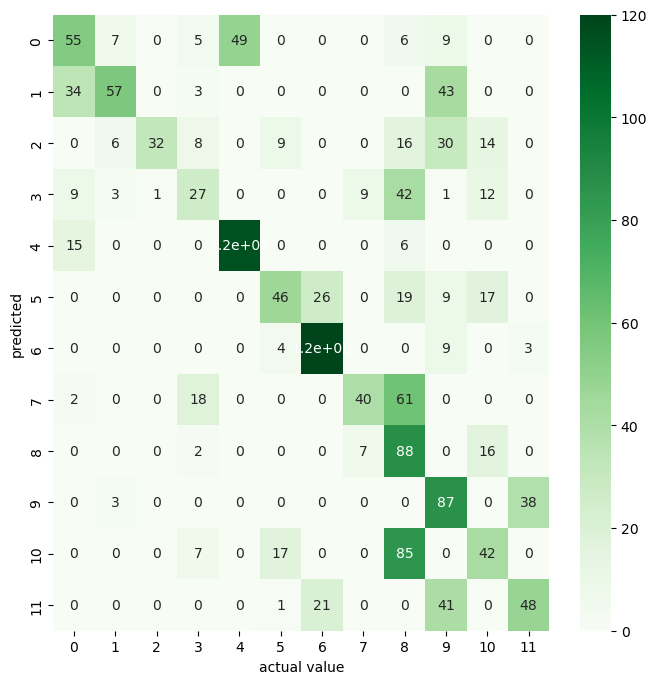

In [103]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Greens")
plt.xlabel("actual value")
plt.ylabel("predicted")

DECISION TREE

In [104]:
predicted_value=dt.predict(x_test)

In [105]:
actual_value=y_test

In [106]:
accuracy_score(actual_value,predicted_value)

1.0

In [107]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       117
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       128
          10       1.00      1.00      1.00       151
          11       1.00      1.00      1.00       111

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [108]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 117,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

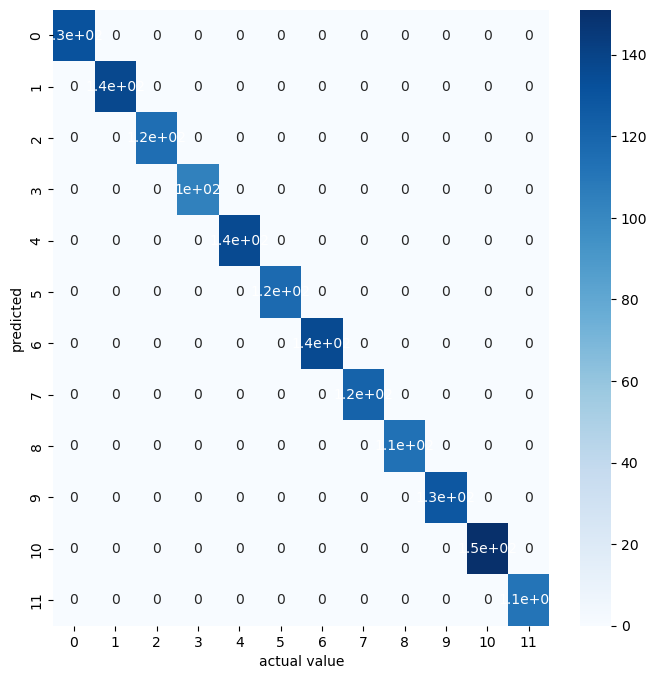

In [109]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("actual value")
plt.ylabel("predicted")

In [110]:
predicted_value=rf.predict(x_test)

In [111]:
actual_value=y_test

In [112]:
accuracy_score(actual_value,predicted_value)

1.0

In [113]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       117
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       128
          10       1.00      1.00      1.00       151
          11       1.00      1.00      1.00       111

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [114]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 117,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

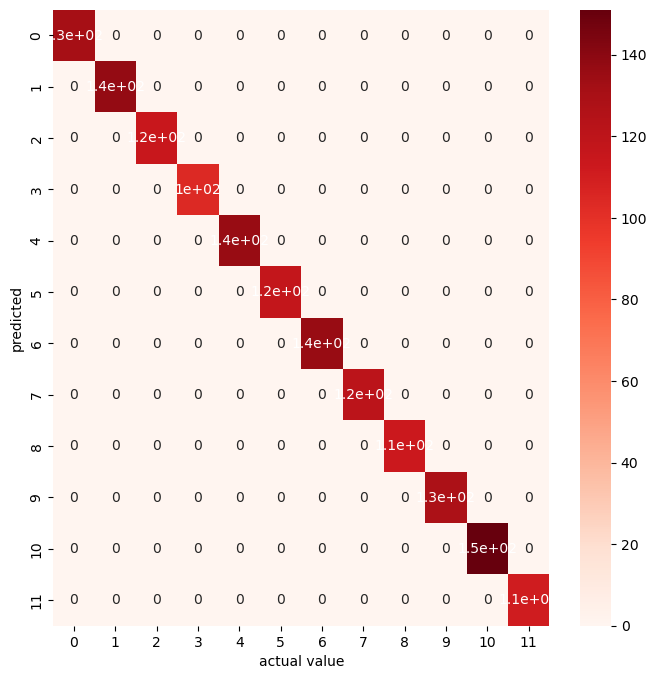

In [115]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Reds")
plt.xlabel("actual value")
plt.ylabel("predicted")

RANDOM FOREST CLASSIFIER

In [116]:
predicted_value=rf.predict(x_test)

In [117]:
actual_value=y_test

In [118]:
accuracy_score(actual_value,predicted_value)

1.0

In [119]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       117
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       128
          10       1.00      1.00      1.00       151
          11       1.00      1.00      1.00       111

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [120]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 117,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

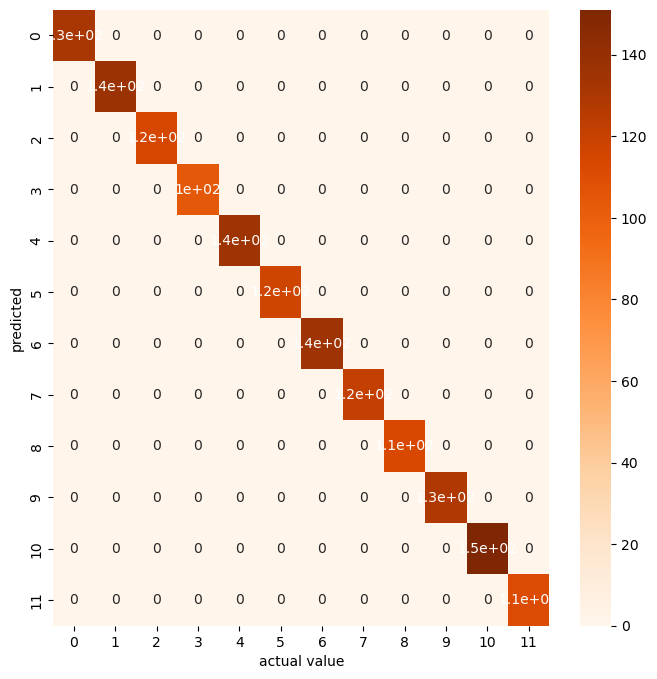

In [121]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Oranges")
plt.xlabel("actual value")
plt.ylabel("predicted")

KNNEIGHBORS

In [138]:
predicted_value=knn.predict(x_test)

In [139]:
actual_value=y_test

In [140]:
accuracy_score(actual_value,predicted_value)

0.08866666666666667

In [141]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       0.11      0.24      0.15       131
           1       0.09      0.15      0.11       137
           2       0.06      0.07      0.06       115
           3       0.04      0.06      0.04       104
           4       0.12      0.10      0.11       136
           5       0.08      0.07      0.07       117
           6       0.12      0.06      0.08       136
           7       0.07      0.06      0.06       121
           8       0.09      0.06      0.07       113
           9       0.14      0.09      0.11       128
          10       0.07      0.03      0.04       151
          11       0.12      0.06      0.08       111

    accuracy                           0.09      1500
   macro avg       0.09      0.09      0.08      1500
weighted avg       0.09      0.09      0.08      1500



In [143]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[32,  8,  8, 16,  9,  9,  4, 16, 15,  3,  5,  6],
       [23, 21, 12,  7, 11, 13,  6,  4, 11, 14,  8,  7],
       [28, 15,  8, 14, 11,  6,  2,  6,  5,  7,  6,  7],
       [16, 24, 10,  6,  9,  8,  5,  9,  4,  5,  5,  3],
       [29, 18, 16,  8, 13, 10,  6, 13,  5,  6,  8,  4],
       [21, 17, 21, 20,  2,  8,  4,  7,  5,  4,  4,  4],
       [17, 25, 10, 26,  9,  7,  8, 13,  4,  4,  8,  5],
       [27, 17, 12, 11, 12,  9,  3,  7,  5,  5,  7,  6],
       [23, 21,  9, 17,  8,  6,  6,  3,  7,  7,  5,  1],
       [25, 25, 14, 13,  7,  8,  6,  6,  3, 11,  6,  4],
       [31, 27, 13, 12,  9, 10, 11, 11, 11,  7,  5,  4],
       [25, 15, 10, 21,  7,  4,  6,  5,  2,  3,  6,  7]], dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

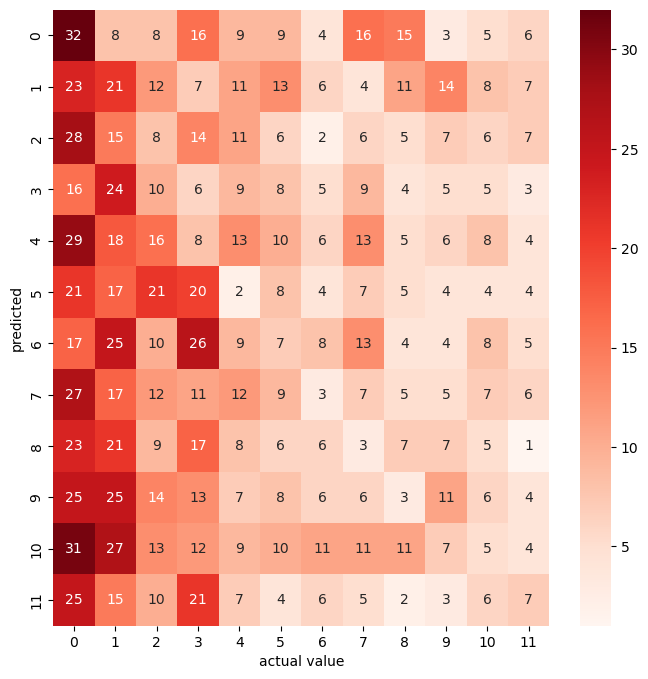

In [144]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Reds")
plt.xlabel("actual value")
plt.ylabel("predicted")

SUPPORT VECTOR MACHINE

LINEAR

In [148]:
predicted_value=svm.predict(x_test)

In [149]:
actual_value=y_test

In [150]:
accuracy_score(actual_value,predicted_value)

1.0

In [151]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       117
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       128
          10       1.00      1.00      1.00       151
          11       1.00      1.00      1.00       111

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [152]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 117,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

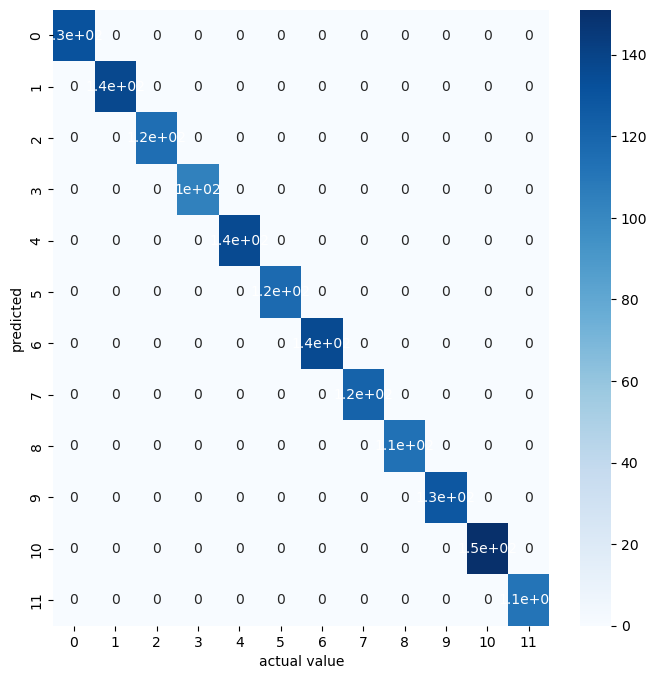

In [153]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("actual value")
plt.ylabel("predicted")

SIGMOID

In [157]:
predicted_value=svm2.predict(x_test)

In [158]:
actual_value=y_test

In [159]:
accuracy_score(actual_value,predicted_value)

0.078

In [161]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       0.08      0.40      0.13       131
           1       0.20      0.01      0.01       137
           2       0.08      0.49      0.14       115
           3       0.06      0.06      0.06       104
           4       0.00      0.00      0.00       136
           5       0.00      0.00      0.00       117
           6       0.00      0.00      0.00       136
           7       0.00      0.00      0.00       121
           8       0.00      0.00      0.00       113
           9       0.06      0.01      0.01       128
          10       0.00      0.00      0.00       151
          11       0.00      0.00      0.00       111

    accuracy                           0.08      1500
   macro avg       0.04      0.08      0.03      1500
weighted avg       0.04      0.08      0.03      1500



In [162]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[53,  1, 64, 11,  0,  0,  0,  0,  0,  2,  0,  0],
       [56,  1, 61, 17,  0,  0,  0,  0,  0,  2,  0,  0],
       [50,  2, 56,  6,  0,  0,  0,  0,  0,  1,  0,  0],
       [40,  0, 54,  6,  0,  0,  0,  0,  0,  2,  0,  2],
       [62,  0, 65,  7,  0,  0,  0,  0,  0,  2,  0,  0],
       [63,  0, 46,  5,  0,  0,  0,  0,  0,  3,  0,  0],
       [63,  0, 62, 10,  0,  0,  0,  0,  0,  1,  0,  0],
       [62,  0, 53,  6,  0,  0,  0,  0,  0,  0,  0,  0],
       [63,  0, 39, 10,  0,  0,  0,  0,  0,  1,  0,  0],
       [58,  1, 56, 12,  0,  0,  0,  0,  0,  1,  0,  0],
       [77,  0, 65,  8,  0,  0,  0,  0,  0,  1,  0,  0],
       [54,  0, 50,  7,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

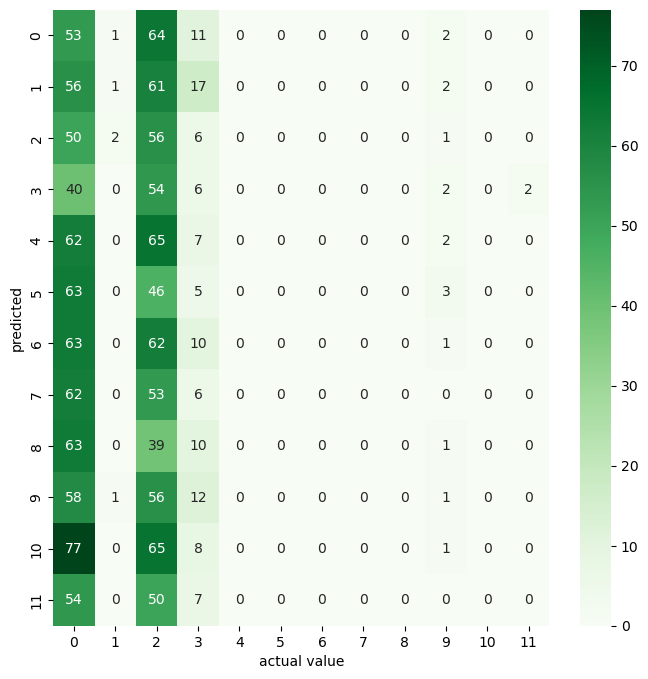

In [163]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Greens")
plt.xlabel("actual value")
plt.ylabel("predicted")

RBF

In [166]:
predicted_value=svm3.predict(x_test)

In [167]:
actual_value=y_test

In [168]:
accuracy_score(actual_value,predicted_value)

0.074

In [169]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       137
           2       0.00      0.00      0.00       115
           3       0.07      0.74      0.12       104
           4       0.00      0.00      0.00       136
           5       0.00      0.00      0.00       117
           6       0.00      0.00      0.00       136
           7       0.00      0.00      0.00       121
           8       0.00      0.00      0.00       113
           9       0.00      0.00      0.00       128
          10       0.09      0.23      0.13       151
          11       0.00      0.00      0.00       111

    accuracy                           0.07      1500
   macro avg       0.01      0.08      0.02      1500
weighted avg       0.01      0.07      0.02      1500



In [170]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[  0,   0,   0,  92,   0,   0,   0,   0,   0,   0,  39,   0],
       [  0,   0,   0,  99,   0,   0,   0,   0,   0,   0,  38,   0],
       [  0,   0,   0,  86,   0,   0,   0,   0,   0,   0,  29,   0],
       [  0,   0,   0,  77,   0,   0,   0,   0,   0,   0,  27,   0],
       [  0,   0,   0,  97,   0,   0,   0,   0,   0,   0,  39,   0],
       [  0,   0,   0,  98,   0,   0,   0,   0,   0,   0,  19,   0],
       [  0,   0,   0, 101,   0,   0,   0,   0,   0,   0,  35,   0],
       [  0,   0,   0,  95,   0,   0,   0,   0,   0,   0,  26,   0],
       [  0,   0,   0,  91,   0,   0,   0,   0,   0,   0,  22,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0,  28,   0],
       [  0,   0,   0, 117,   0,   0,   0,   0,   0,   0,  34,   0],
       [  0,   0,   0,  84,   0,   0,   0,   0,   0,   0,  27,   0]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

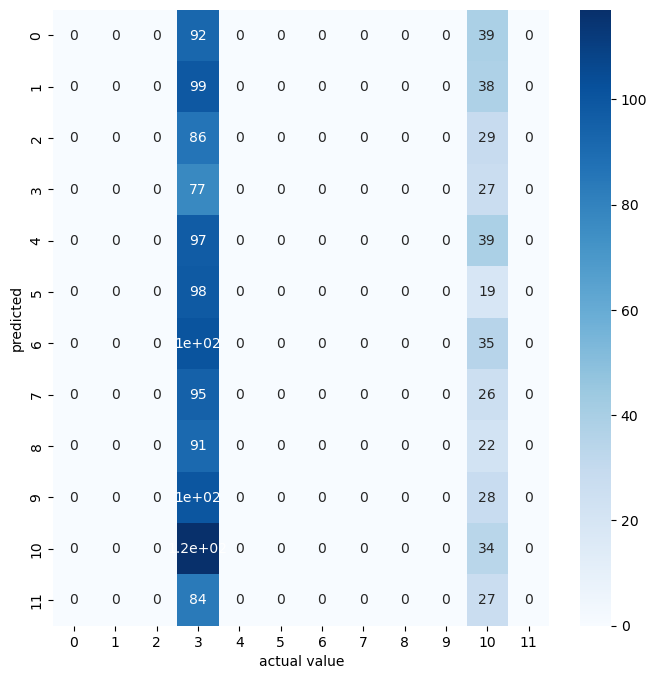

In [171]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("actual value")
plt.ylabel("predicted")

NAIVE BAYES

GAUSSIAN NB

In [174]:
predicted_value=nb.predict(x_test)

In [175]:
actual_value=y_test

In [176]:
accuracy_score(actual_value,predicted_value)

1.0

In [177]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       117
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       128
          10       1.00      1.00      1.00       151
          11       1.00      1.00      1.00       111

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [178]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 117,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

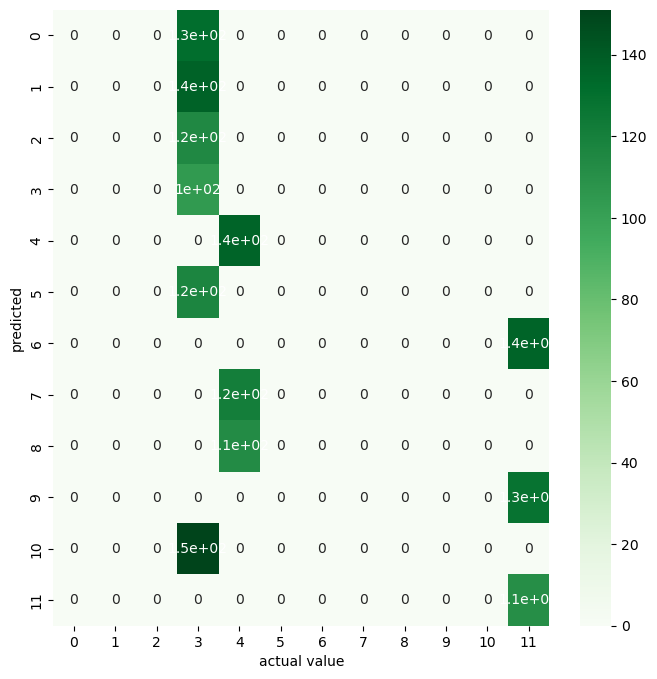

In [198]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Greens")
plt.xlabel("actual value")
plt.ylabel("predicted")

XGBOOSTING

In [197]:
predicted_value=xg.predict(x_test)
actual_value=y_test

In [183]:
accuracy_score(actual_value,predicted_value)

1.0

In [184]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       117
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       128
          10       1.00      1.00      1.00       151
          11       1.00      1.00      1.00       111

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [185]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 117,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

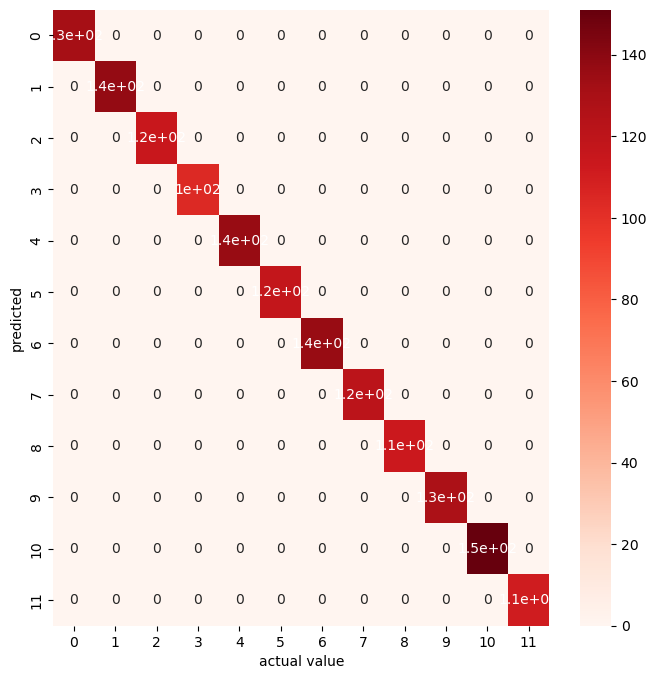

In [186]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Reds")
plt.xlabel("actual value")
plt.ylabel("predicted")

ADABOOSTING

In [190]:
predicted_value=adb.predict(x_test)

In [191]:
actual_value=y_test

In [192]:
accuracy_score(actual_value,predicted_value)

0.234

In [193]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       137
           2       0.00      0.00      0.00       115
           3       0.14      1.00      0.24       104
           4       0.37      1.00      0.54       136
           5       0.00      0.00      0.00       117
           6       0.00      0.00      0.00       136
           7       0.00      0.00      0.00       121
           8       0.00      0.00      0.00       113
           9       0.00      0.00      0.00       128
          10       0.00      0.00      0.00       151
          11       0.30      1.00      0.46       111

    accuracy                           0.23      1500
   macro avg       0.07      0.25      0.10      1500
weighted avg       0.06      0.23      0.10      1500



In [194]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[  0,   0,   0, 131,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 137,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 117,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 136],
       [  0,   0,   0,   0, 121,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 113,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128],
       [  0,   0,   0, 151,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

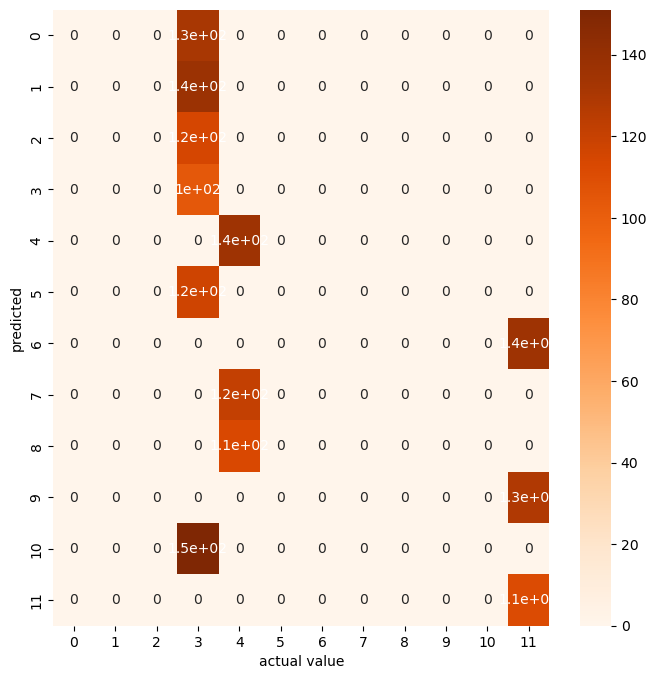

In [196]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Oranges")
plt.xlabel("actual value")
plt.ylabel("predicted")

GRADIENT BOOSTING

In [207]:
predicted_value=gb.predict(x_test)

In [208]:
actual_value=y_test

In [209]:
accuracy_score(actual_value,predicted_value)

1.0

In [210]:
print(classification_report(actual_value,predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       117
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       128
          10       1.00      1.00      1.00       151
          11       1.00      1.00      1.00       111

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [211]:
cm=confusion_matrix(actual_value,predicted_value)
cm

array([[131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 117,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111]],
      dtype=int64)

Text(70.72222222222221, 0.5, 'predicted')

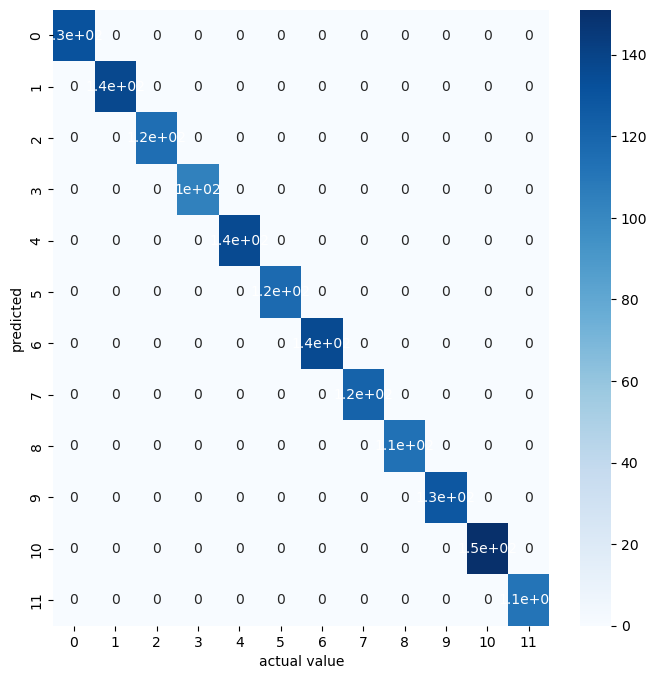

In [212]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("actual value")
plt.ylabel("predicted")